# Analysis of uCT image analysis data sets

# Import Libraries

In [1]:
#Standard
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math as m
import pandas as pd
import scipy.stats as stats
from scipy.stats import iqr, kurtosis, skew
from tqdm import tnrange, tqdm_notebook
from statannot import add_stat_annotation

#Dicritisation
from sklearn.preprocessing import KBinsDiscretizer

# Set data location

In [6]:
#where is data located    
loc = '/Users/ristomartin/OneDrive/Dropbox/UniStuff/DPhil/Experimental/python_analysis/uCT/hollow_fibre/output/06ID/image_analysis_data/'

#location for saved data
save_loc = '/Users/ristomartin/OneDrive/Dropbox/UniStuff/DPhil/Experimental/python_analysis/uCT/hollow_fibre/output/06ID/processed_data/'

# Define Functions

In [7]:
def removeoutliers(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    new_dataframe = dataframe[~((dataframe < (Q1 - 1.5 * IQR)) |(dataframe > (Q3 + 1.5 * IQR))).any(axis=1)]
    return new_dataframe

# Processing Image Data

## Unification of data

In [8]:
Run = True

if Run == True:
    #Generate list of file in data location
    files = [x for x in os.listdir(loc) if x.endswith(('.csv'))==True and x.startswith('._')==False]

####################################################################################################################################
####First want to go through and see which data sets are to be combined - get this information by breaking down file name#####
####################################################################################################################################

    #Create dictionary of similar data sets
    data_sets = {}
    #Itterate through each of the data files adding each to the dictionary based on varying characteristic
    for f in files:
        #split file name and extract the defining characteristic
        var = f.split('_')[2]
        
        #Check if defining characteristic is in dictionary 
        if var not in data_sets:
            data_sets.setdefault(var,[]).append(f)
        #Check if file name exists in dictionary
        elif f not in data_sets[var]:
            data_sets.setdefault(var,[]).append(f)
                    
##########################################################################################################################################################
    #Once established which files are to be combined then want to go through combine data sets and then Equal-Width discritise into bins of set size
##########################################################################################################################################################

    #Create list of dataframe headings to be used in summary dataframe
    columns = ['porosity','max_dis','min_dis','wall_median','wall_mean','wall_skew','wall_stat','faspect_ratio','laspect_ratio']
    
    #Itterate through each of the defining characteristics identifited in datasets dictionary
    for d in data_sets:
        #for each of the defining characteristics make collated dataframe from which discritised data will be produced
        col_df = pd.DataFrame()
        #Itterate through each of the dataframes associated with each of the defining characteristics
        for f in data_sets[d]:
            #Open dataset associated with filename
            df = pd.read_csv(os.path.join(loc+f),index_col=0)
            #concatonate all of the lists into a single massive list
            col_df = pd.concat([col_df, df], axis=0,ignore_index=True,sort=False)
            
##########################################################################################################################################################
    ###Discritising data into bins of set size## -- may not do this as doesnt seem to have much utility for my purpose will maybe revisit
##########################################################################################################################################################

        # #for each of the defining characteristics make summary dataframe to which discritied data is to be saved
        # sum_df = pd.DataFrame()

        # #Having produced a dataframe with all data of the same defining characteristic now want to discritise data
        # data = col_df['wall_mean'].to_numpy()
        # #Set width of bins that you want 
        # w = 5
        # #from the width of the bins determine number of bins
        # n = round((max(data) - min(data)) / w)
        # # histogram of data
        # plt.hist(data, bins=n)
        # plt.show()
        # #generate discritizer associated with number of desired bins
        # discretizer = KBinsDiscretizer(n_bins=n, encode='ordinal', strategy='uniform')
        # # reshape data to have rows and columns
        # data = data.reshape((len(data),1))
        # #transform data into transformed data set according to number of bins        
        # data_trans = discretizer.fit_transform(data)        
        # # histogram of the transformed data
        # plt.hist(data_trans, bins=n)
        # plt.show()
        # print(data_trans)

##########################################################################################################################################################
    ###Save out combined data files
##########################################################################################################################################################
        
        #Save out combined data file
        col_df.to_csv(save_loc+'combined_data/'+'draw_rate_'+d+'.csv', index=False)
        


## Plotting of discritised data

In [11]:
y_label = {'faspect_ratio':'Aspect Ratio','porosity':'Porosity (%)','wall_mean':'Mean wall thickness (um)','wall_median':'Median wall thickness (um)'} #y-axis labels

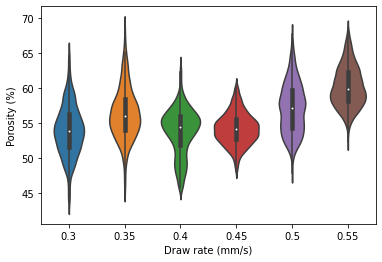

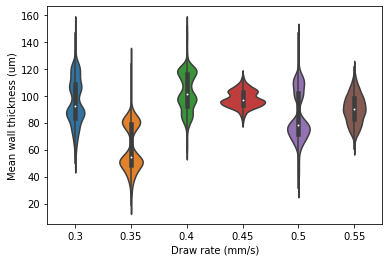

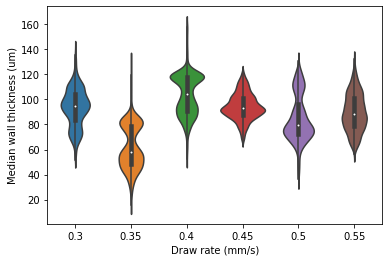

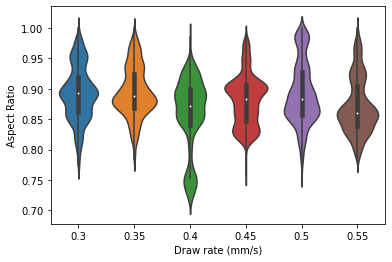

In [13]:
Run = True

#Set list of columns in data that you want to plot
columns = ['porosity','wall_mean','wall_median','faspect_ratio']

if Run == True:
    #Generate list of file in data location
    files = [x for x in os.listdir(save_loc+'combined_data/') if x.endswith(('.csv'))==True and x.startswith('._')==False]
    #Itterate through each of the variables that want to consider
    for c in columns:
        #Make dataframe to hold collated data associated with each defining variable 
        col_df = pd.DataFrame()
        #Itterate through each of the data files adding each to the dictionary based on varying characteristic
        for f in files:
            #Define variable associated with each data set
            var = f.split('_')[2][:-4]
            #define variable in terms of int facilitate ordering
            var = float(var)/10
            if var>1:
                var = var/10

            #Open dataset associated with filename
            data = pd.read_csv(os.path.join(save_loc+'combined_data/'+f),index_col=False)
            #Extract associated data
            data = pd.DataFrame(data[c].to_numpy())
            #Remove outliers to make violin plots clearer
            data = removeoutliers(data)          
            #Make column with defining characteristic defined
            data['1'] = var
            #concatonate data
            col_df = pd.concat([col_df, data], axis=0,ignore_index=True,sort=False)

        #produce violin plots 
        #create new template for figure
        fig, ax = plt.subplots()
        #plot violin plot into figure
        v_plt = sns.violinplot(x=col_df.iloc[:,1],y=col_df.iloc[:,0])
        #Set figure headings
        ax.set_ylabel(y_label[c])
        ax.set_xlabel(r'Draw rate (mm/s)')
        ax.figure.savefig(save_loc+'figures/'+c+'.png',bbox_inches='tight', dpi=300)
        
        


        
        
        

# Legacy below

In [ ]:
raw_pore = save_loc+'MicroCT/porosity_data/'
print(raw_pore)

In [ ]:
#Label each of the columns to be in final dataframe
#uni_columns = ['fmajor_axis', 'fminor_axis', 'faspect_ratio', 'lmajor_axis', 'lminor_axis', 'laspect_ratio', 'porosity','fwall_mthickness']

#create dataframe for all data
cdf = pd.DataFrame()

for filename in os.listdir(raw_pore+'preprocessed/'):
    #only open the file if it end with the specified parameters as specified in file name
    if filename.endswith(".csv"):    
        #reads the specified directory and opens it as a dataframe
        df = pd.read_csv(os.path.join(raw_pore+'preprocessed/'+filename),index_col=0)
        
        #print(df.head())
        
        #Copy process parameters from sample key
        df['Pyridine Concentration'] = sample_key.loc[sample_key['uCT_filename'] == filename, 'pyridine_conc'].iloc[0]
        df['Wire Speed'] = sample_key.loc[sample_key['uCT_filename'] == filename, 'wire_speed'].iloc[0]
        df['Rotation Speed'] = sample_key.loc[sample_key['uCT_filename'] == filename, 'rotation_speed'].iloc[0]
        df['Polymer Solution'] = sample_key.loc[sample_key['uCT_filename'] == filename, 'solution_name'].iloc[0]
        voltage = sample_key.loc[sample_key['uCT_filename'] == filename, 'voltage'].iloc[0]
        min_voltage = sample_key.loc[sample_key['uCT_filename'] == filename, 'min_voltage'].iloc[0]
        max_voltage = sample_key.loc[sample_key['uCT_filename'] == filename, 'max_voltage'].iloc[0]
        df['Voltage Range'] = (((voltage-min_voltage)/(max_voltage-min_voltage))*100).round(0)
        
        #calculate maxiumum wall thickness
        df['fwall_mthickness'] = (df['fmajor_axis'] - df['lminor_axis'])/2
         
        #concatonate all of the lists into a single massive list
        cdf = pd.concat([df, cdf], axis=0,ignore_index=True,sort=False)
#print(cdf.head())
cdf.to_csv(save_loc+'MicroCT/porosity_data/processed/'+'cdf.csv')

## Processing fresh distributions to make summary file

In [ ]:
def removeoutliers(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    new_dataframe = dataframe[~((dataframe < (Q1 - 1.5 * IQR)) |(dataframe > (Q3 + 1.5 * IQR))).any(axis=1)]
    return new_dataframe

def statskew(dataframe,property_column):
    property_median = dataframe[property_column].median()
    property_mean = dataframe[property_column].mean()
    property_skew = skew(dataframe[property_column])
    Q1 = dataframe[property_column].quantile(0.25)
    Q3 = dataframe[property_column].quantile(0.75)
    IQR = Q3 - Q1
    if abs(property_skew) > 0.5:
        property = property_median
    else:
        property = property_mean
    return property,IQR

## Unification of distribution summaries

In [ ]:
#creating dataframe for processed fibre properties
columns = ['fmajor_axis', 'fminor_axis', 'faspect_ratio', 'lmajor_axis', 'lminor_axis', 'laspect_ratio', 'porosity']
pfp = pd.DataFrame(columns = columns)

#First copy all raw data file which you want to compare into a single file and then insert directory of file below
#This then retreves the name of each file in the specified directory and cycle through them with the following
for filename in os.listdir(raw_pore+'preprocessed/'):
    #only open the file if it end with the specified parameters as specified in file name
    if filename.endswith(".csv"):      
        #reads the specified directory and opens it as a dataframe
        df = pd.read_csv(os.path.join(raw_pore+'preprocessed/',filename))
        
        pore_min = df['porosity'].min()
        pore_max = df['porosity'].max()
        
        #screening outliers from dataframe
        sfp = removeoutliers(df)

        #defining the statistical centre of each measured value - taking the statistical measure depending on skew
        fmajor_axis,fmajor_IQR = statskew(sfp,'fmajor_axis')
        fminor_axis,fminor_IQR = statskew(sfp,'fminor_axis')
        faspect_ratio,faspect_IQR = statskew(sfp,'faspect_ratio')
        lmajor_axis,lmajor_IQR = statskew(sfp,'lmajor_axis')
        lminor_axis,lminor_IQR = statskew(sfp,'lminor_axis')
        laspect_ratio,laspect_IQR = statskew(sfp,'laspect_ratio')
        porosity,pore_IQR = statskew(sfp,'porosity')
        fwall_mthickness = (fmajor_axis - lminor_axis)/2
        fwall_mthickness_IQR = (fmajor_IQR + lminor_IQR)/2

        #Import key fibre information
        Pyridine_Concentration = sample_key.loc[sample_key['uCT_filename'] == filename, 'pyridine_conc'].iloc[0]
        Wire_Speed = sample_key.loc[sample_key['uCT_filename'] == filename, 'wire_speed'].iloc[0]
        Rotation_Speed = sample_key.loc[sample_key['uCT_filename'] == filename, 'rotation_speed'].iloc[0]
        abs_pcl_conc = sample_key.loc[sample_key['uCT_filename'] == filename, 'abs_pcl_conc'].iloc[0]
        abs_pdo_conc = sample_key.loc[sample_key['uCT_filename'] == filename, 'abs_pdo_conc'].iloc[0]
        Polymer_Composition = ((abs_pcl_conc*100).round(2).astype(str) +'%PCL')+'\n'+((abs_pdo_conc*100).round(2).astype(str) +'%PDO')
        voltage = sample_key.loc[sample_key['uCT_filename'] == filename, 'voltage'].iloc[0]
        min_voltage = sample_key.loc[sample_key['uCT_filename'] == filename, 'min_voltage'].iloc[0]
        max_voltage = sample_key.loc[sample_key['uCT_filename'] == filename, 'max_voltage'].iloc[0]
        Voltage_Range = (((voltage-min_voltage)/(max_voltage-min_voltage))*100).round(0)
        
        #append processed information 
        pfp = pfp.append({'fmajor_axis':fmajor_axis, 'fminor_axis':fminor_axis, 'faspect_ratio':faspect_ratio, 
                          'lmajor_axis':lmajor_axis, 'lminor_axis':lminor_axis, 'laspect_ratio':laspect_ratio, 
                          'porosity':porosity, 'Pyridine Concentration':Pyridine_Concentration,'Wire Speed':Wire_Speed, 
                          'Rotation Speed':Rotation_Speed,'Polymer Composition':Polymer_Composition,
                          'Voltage Range': Voltage_Range,'pore_IQR':pore_IQR,'fmajor_IQR':fmajor_IQR,'fminor_IQR':fminor_IQR,
                          'faspect_IQR':faspect_IQR,'lmajor_IQR':lmajor_IQR,'lminor_IQR':lminor_IQR,'laspect_IQR':laspect_IQR,
                          'fwall_mthickness':fwall_mthickness,'fwall_mthickness_IQR':fwall_mthickness_IQR}, ignore_index=True)
        
       
        
        
pfp.to_csv(save_loc+'MicroCT/porosity_data/processed/'+'all_processed'+'.csv')
#print(pfp)

# Plotting

In [ ]:
import sys
print(sys.path)

In [ ]:
#Want to consider the effect of each variable however as data is not filtered need to filter to evaluate the effect of only a single variable at a given time
def varlayer(layer_num,layer_lst):
    for layer_num in layer_lst:
        #find all of the unique values of the 2nd controlled variable
        uniquevalues = np.unique(grp2[layer_num].values)
        for id in uniquevalues:
            #create a dataframe which contains only fixed values of controlled variable 3
            #create grp1 from variable in variable list
            for key, nxtgrp in grp.groupby([layer_num]):
                #To continue fixing the variable now shorten variable list to consider only other uncontrolled variables
                nxt_layer_lst = layer_lst.copy() #list of secondary controlled variables
                #removing x-axis variable so only consider changing variables
                nxt_layer_lst.remove(layer_num)
                return nxtgrp,nxt_layer_lst

## From preprocessed data

In [ ]:
#first define variables to be quiried 
variables = ['Rotation Speed','Wire Speed','Pyridine Concentration','Polymer Solution','Voltage Range']
#import summary data
df = pd.read_csv(os.path.join(save_loc+'/'+'MicroCT'+'/'+'porosity_data'+'/'+'processed'+'/'+'cdf.csv'),index_col=0)

#Filter summariesed data to isolate single variable effect
for variable in variables:
        #find all of the unique values of the 1st controlled variable
        uniquevalues = np.unique(df[variable].values)
        #for each of the different variables make dataframe further sub divided
        for id1 in uniquevalues:
            #create a dataframe which contains only fixed values of controlled variable 1
            newdf1 = df[df[variable] == id1]
            #To continue fixing the variable now shorten variable list to consider only other uncontrolled variables
            #starting from x_hue
            variable_lst2 = variables.copy() #list of secondary controlled variables
            #removing x-axis variable so only consider changing variables
            variable_lst2.remove(variable)
            
            for variable2 in variable_lst2:
                #find all of the unique values of the 1st controlled variable
                uniquevalues = np.unique(newdf1[variable2].values)
                #for each of the different variables make dataframe further sub divided
                for id2 in uniquevalues:
                    #create a dataframe which contains only fixed values of controlled variable 2
                    newdf2 = newdf1[newdf1[variable2] == id2]
                    #To continue fixing the variable now shorten variable list to consider only other uncontrolled variables
                    #starting from x_hue
                    variable_lst3 = variable_lst2.copy() #list of secondary controlled variables
                    #removing x-axis variable so only consider changing variables
                    variable_lst3.remove(variable2)
                    
                    for variable3 in variable_lst3:
                        #find all of the unique values of the 1st controlled variable
                        uniquevalues = np.unique(newdf2[variable3].values)
                        #for each of the different variables make dataframe further sub divided
                        for id3 in uniquevalues:
                            #create a dataframe which contains only fixed values of controlled variable 3
                            newdf3 = newdf2[newdf2[variable3] == id3]
                            #To continue fixing the variable now shorten variable list to consider only other uncontrolled variables
                            #starting from x_hue
                            variable_lst4 = variable_lst3.copy() #list of secondary controlled variables
                            #removing x-axis variable so only consider changing variables
                            variable_lst4.remove(variable3)
                            
                            for variable4 in variable_lst4:
                                #starting from x_hue
                                variable_lst4 = variable_lst3.copy() #list of secondary controlled variables
                                #removing x-axis variable so only consider changing variables
                                variable_lst4.remove(variable3)
                                #find all of the unique values of the 1st controlled variable
                                uniquevalues = np.unique(newdf3[variable4].values)
                                #for each of the different variables make dataframe further sub divided
                                
                                for id4 in uniquevalues:
                                    #starting from x_hue
                                    variable_lst5 = variable_lst4.copy() #list of secondary controlled variables
                                    #removing x-axis variable so only consider changing variables
                                    variable_lst5.remove(variable4)
                                    #create a dataframe which contains only fixed values of controlled variable 4
                                    newdf4 = newdf3[newdf3[variable4] == id4]
                                    
                                    #In order to prevent duplications of files with same fixed variables but in different order
                                    #make list of variables and order them
                                    fxd_ivars = [str(id1),str(id2),str(id3),str(id4)]
                                    fxd_ivars = sorted(fxd_ivars)
                                                                        
                                    #identify the different vaiables present to allow for potential statistical comparison
                                    uniquevalues = np.unique(newdf4[variable_lst5[0]].values)

                                    #create list of valuesvalues = []
                                    values = []
                                    #for each value remove PPM and convert to interger
                                    for value in uniquevalues:
                                        values.append(value)
                                    #sort the list of values according to size
                                    values.sort(reverse = False)
                                    
                                    
                                    #if there are more than one variable continue to plot
                                    if len(values) > 2:         

                                        #Within the uncontrolled variable want to identify all the condidtions used
                                        #uniquevalues = np.unique(newdf4[variable_lst5[0]].values)

                                        #For each combination of the controlled variables want to evaluate how each metric changes
                                        metrics = ['fmajor_axis','fminor_axis','faspect_ratio','lmajor_axis','lminor_axis',
                                                   'laspect_ratio','porosity','fwall_mthickness']
                                        #Evaluating the change in each of the metrics
                                        for metric in metrics:
                                            
                                           
                                            #for each oof the conditions used in the uncontrolled variable
                                            for id5 in uniquevalues:
                                                #To prevent duplication check if quiry has been made
                                                if not os.path.isfile(save_loc+'/'+'MicroCT/'+'figures'+'/'+str(variable_lst5[0])+str(fxd_ivars)+metric+'.png'):
                                                    #isolate the data associated for the same conditions used 
                                                    #newdf5 = newdf4[newdf4[variable_lst5[0]] == id5]
                                                    
                                                    
                                                    #To be able to screen outliers with this method cannot have strings in table as these cannot be compared with >
                                                    #For this reason have started to refer to different polymer solutions by numbers
                                                    #screening outliers from dataframe
                                                    #newdf4 = removeoutliers(newdf4,variable_lst5[0])
                                                    #print(newdf4)
                                                    Q1 = newdf4.quantile(0.25)
                                                    #print(Q1)
                                                    Q3 = newdf4.quantile(0.75)
                                                    #print(Q3)
                                                    IQR = Q3 - Q1
                                                    newdf4 = newdf4[~((newdf4 < (Q1 - 1.5 * IQR)) |(newdf4 > (Q3 + 1.5 * IQR))).any(axis=1)]
                                                    #print(newdf4)
                                                    #print(snewdf4)
                                                    
                                                    #Create new figure for each metric considered
                                                    fig, ax = plt.subplots()
                                                    
                                                    #make scatter plot of data associated with each of the metrics
                                                    #fig1 = ax.errorbar(newdf5[variable_lst5[0]], newdf5[metric], fmt='o',label=label)
                                                    fig = sns.violinplot(x= newdf4[variable_lst5[0]], y= newdf4[metric], showfliers=True, order= values,ax=ax)
                                                    #to account for solutions being refered to by number now must extract number from figure
                                                    if variable_lst5[0] == 'Polymer Solution':
                                                        polysolkey = {'0.0':'Trial','1.0':'Initial' ,'2.0':'S1','3.0':'S2',
                                                                      '4.0':'S3','5.0':'S4','6.0':'S5'}
                                                        labels = [t.get_text()  for t in ax.get_xticklabels()]
                                                    #    print(labels)
                                                        new_labels = [polysolkey[l] for l in labels]
                                                    #    print(new_labels)
                                                        fig.set_xticklabels(new_labels)

                                                    #before can add statistical annotation must create boxPairList from previous statistical comparison table
                                                    #create list for boxpairlist
                                                    pre_boxPairList = []


                                                    #for count of number of o values
                                                    for index in range(len(values)):
                                                        #to ensure that all combinations are considered again copy the uniquevalues
                                                        avalues = values.copy() #colour hue
                                                        #removing fixed variable so only consider changing variables
                                                        avalues.remove(values[index])
                                                        #considereing the appending value
                                                        for index in range(len(avalues)):
                                                            #let a = the file name and the ovalue which corresponds to the number within the list and pair them
                                                            a = (avalues[index],values[index])
                                                            #add the pair to the list of boxed pairs
                                                            if avalues[index] != values[index]:
                                                                if a not in pre_boxPairList:
                                                                    pre_boxPairList.append(a)
                                                            else: pass
                                                    #pre_boxPairList = sorted(pre_boxPairList)
                                                    #print(pre_boxPairList)

                                                    #add statistical annotations
                                                    add_stat_annotation(x= newdf4[variable_lst5[0]], y= newdf4[metric],order= values,showfliers=True,
                                                                        boxPairList=pre_boxPairList,test='Mann-Whitney', textFormat='star', loc='inside', verbose=0,
                                                                        ax=ax)

                                                    #label axis
                                                    #create dictionary of y-axis labels associated with each of the metrics
                                                    y_lables = {'fmajor_axis':'Maximum Fibre Diameter ($\mu$m)','fminor_axis':'Minimum Fibre Diameter ($\mu$m)',
                                                                'faspect_ratio':'Fibre Aspect Ratio','lmajor_axis':'Maximum Lumen Diameter ($\mu$m)',
                                                                'lminor_axis':'Minimum Lumen Diameter ($\mu$m)','laspect_ratio':'Lumen Aspect Ratio',
                                                                'porosity':'Porosity (%)','fwall_mthickness':'Maximum Fibre Wall thickness'}

                                                    x_lables = {'Polymer Composition':'Polymer Composition','Pyridine Concentration':'Pyridine Concentration (PPM)',
                                                               'Polymer Solution':'Polymer Solution'}

                                                    ax.set_ylabel(y_lables[metric])
                                                    ax.set_xlabel(x_lables[variable_lst5[0]])

                                                    #bx_data = [bx_q1,bx_med,bx_q3]

                                                    #ax = sns.boxplot(data=bx_data)

                                                    #after looping through all of the catagories, save figure
                                                    ax.figure.savefig(save_loc+'/'+'MicroCT/'+'figures'+'/'+str(variable_lst5[0])+str(fxd_ivars)+metric+'.png',bbox_inches='tight', dpi=300)

## From Summary Data

In [ ]:
#first define variables to be quiried 
variables = ['Rotation Speed','Wire Speed','Pyridine Concentration','Polymer Composition','Voltage Range']
#import summary data
df = pd.read_csv(os.path.join(save_loc+'/'+'MicroCT'+'/'+'porosity_data'+'/'+'processed'+'/'+'all_processed.csv'))
                   
#Filter summariesed data to isolate single variable effect
for variable in variables:
        #find all of the unique values of the 1st controlled variable
        uniquevalues = np.unique(df[variable].values)
        #for each of the different variables make dataframe further sub divided
        for id1 in uniquevalues:
            #create a dataframe which contains only fixed values of controlled variable 1
            newdf1 = df[df[variable] == id1]
            #To continue fixing the variable now shorten variable list to consider only other uncontrolled variables
            #starting from x_hue
            variable_lst2 = variables.copy() #list of secondary controlled variables
            #removing x-axis variable so only consider changing variables
            variable_lst2.remove(variable)
            
            for variable2 in variable_lst2:
                #find all of the unique values of the 1st controlled variable
                uniquevalues = np.unique(newdf1[variable2].values)
                #for each of the different variables make dataframe further sub divided
                for id2 in uniquevalues:
                    #create a dataframe which contains only fixed values of controlled variable 2
                    newdf2 = newdf1[newdf1[variable2] == id2]
                    #To continue fixing the variable now shorten variable list to consider only other uncontrolled variables
                    #starting from x_hue
                    variable_lst3 = variable_lst2.copy() #list of secondary controlled variables
                    #removing x-axis variable so only consider changing variables
                    variable_lst3.remove(variable2)
                    
                    for variable3 in variable_lst3:
                        #find all of the unique values of the 1st controlled variable
                        uniquevalues = np.unique(newdf2[variable3].values)
                        #for each of the different variables make dataframe further sub divided
                        for id3 in uniquevalues:
                            #create a dataframe which contains only fixed values of controlled variable 3
                            newdf3 = newdf2[newdf2[variable3] == id3]
                            #To continue fixing the variable now shorten variable list to consider only other uncontrolled variables
                            #starting from x_hue
                            variable_lst4 = variable_lst3.copy() #list of secondary controlled variables
                            #removing x-axis variable so only consider changing variables
                            variable_lst4.remove(variable3)
                            
                            for variable4 in variable_lst4:
                                #starting from x_hue
                                variable_lst4 = variable_lst3.copy() #list of secondary controlled variables
                                #removing x-axis variable so only consider changing variables
                                variable_lst4.remove(variable3)
                                #find all of the unique values of the 1st controlled variable
                                uniquevalues = np.unique(newdf3[variable4].values)
                                #for each of the different variables make dataframe further sub divided
                                
                                for id4 in uniquevalues:
                                    #starting from x_hue
                                    variable_lst5 = variable_lst4.copy() #list of secondary controlled variables
                                    #removing x-axis variable so only consider changing variables
                                    variable_lst5.remove(variable4)
                                    #create a dataframe which contains only fixed values of controlled variable 4
                                    newdf4 = newdf3[newdf3[variable4] == id4]
                                    
                                    #save the new dataframe as a csv - to be compared later on
                                    #In order to prevent duplications of files with same fixed variables but in different order
                                    #make list of variables and order them
                                    fxd_ivars = [str(id1),str(id2),str(id3),str(id4)]
                                    fxd_ivars = sorted(fxd_ivars)
                                    
                                    #To prevent duplication check if quiry has been made
                                    if not os.path.isfile(save_loc+'/'+'MicroCT/'+'figures'+'/'+str(variable_lst5[0])+str(fxd_ivars)+metric+'.png'):
                                        
                                        #identify the different vaiables present to allow for potential statistical comparison
                                        uniquevalues = np.unique(newdf4[variable_lst5[0]].values)
                                        
                                        #create list of values
                                        values = []
                                        #for each value remove PPM and convert to interger
                                        for value in uniquevalues:
                                            values.append(value)
                                        #sort the list of values according to size
                                        values.sort(reverse = True)

                                        #before can add statistical annotation must create boxPairList from previous statistical comparison table
                                        #create list for boxpairlist
                                        pre_boxPairList = []


                                        #for count of number of o values
                                        for index in range(len(values)):
                                            #to ensure that all combinations are considered again copy the uniquevalues
                                            avalues = values.copy() #colour hue
                                            #removing fixed variable so only consider changing variables
                                            avalues.remove(values[index])
                                            #considereing the appending value
                                            for index in range(len(avalues)):
                                                #let a = the file name and the ovalue which corresponds to the number within the list and pair them
                                                a = (avalues[index],values[index])
                                                #add the pair to the list of boxed pairs
                                                if avalues[index] != values[index]:
                                                    if a not in pre_boxPairList:
                                                        pre_boxPairList.append(a)
                                                else: pass
                                        #pre_boxPairList = sorted(pre_boxPairList)
                                        #print(pre_boxPairList)
                                        
                                        #if there are more than one variable continue to plot
                                        if len(pre_boxPairList) > 1:
                                            
                                            #Within the uncontrolled variable want to identify all the condidtions used
                                            uniquevalues = np.unique(newdf4[variable_lst5[0]].values)
                                            
                                            #For each combination of the controlled variables want to evaluate how each metric changes
                                            metrics = ['fmajor_axis','fminor_axis','faspect_ratio','lmajor_axis','lminor_axis',
                                                       'laspect_ratio','porosity','fwall_mthickness']
                                            #Evaluating the change in each of the metrics
                                            for metric in metrics:
                                                #Create new figure for each metric considered
                                                fig, ax = plt.subplots()
                                                #for each oof the conditions used in the uncontrolled variable
                                                for id5 in uniquevalues:
                                                    #isolate the data associated for the same conditions used 
                                                    newdf5 = newdf4[newdf4[variable_lst5[0]] == id5]
                                                    
                                                    #create dictionary of IQRs associated with each of the metrics
                                                    IQRs = {'fmajor_axis':'fmajor_IQR','fminor_axis':'fminor_IQR','faspect_ratio':'faspect_IQR',
                                                            'lmajor_axis':'lmajor_IQR','lminor_axis':'lminor_IQR','laspect_ratio':'laspect_IQR',
                                                            'porosity':'pore_IQR','fwall_mthickness':'fwall_mthickness_IQR'}
                                                    
                                                    #make scatter plot of data associated with each of the metrics
                                                    fig1 = ax.errorbar(newdf5[variable_lst5[0]], newdf5[metric], yerr=newdf5[IQRs[metric]], fmt='o',label=label)
                                                    
                                                    #label axis
                                                    #create dictionary of y-axis labels associated with each of the metrics
                                                    y_lables = {'fmajor_axis':'Maximum Fibre Diameter ($\mu$m)','fminor_axis':'Minimum Fibre Diameter ($\mu$m)',
                                                                'faspect_ratio':'Fibre Aspect Ratio','lmajor_axis':'Maximum Lumen Diameter ($\mu$m)',
                                                                'lminor_axis':'Minimum Lumen Diameter ($\mu$m)','laspect_ratio':'Lumen Aspect Ratio',
                                                                'porosity':'Porosity (%)','fwall_mthickness':'Maximum Fibre Wall thickness'}
                                                    
                                                    x_lables = {'Polymer Composition':'Polymer Composition','Pyridine Concentration':'Pyridine Concentration (PPM)'}

                                                    ax.set_ylabel(y_lables[metric])
                                                    ax.set_xlabel(x_lables[variable_lst5[0]])

                                                    bx_data = [bx_q1,bx_med,bx_q3]

                                                    #ax = sns.boxplot(data=bx_data)

                                                #after looping through all of the catagories, save figure
                                                ax.figure.savefig(save_loc+'/'+'MicroCT/'+'figures'+'/'+str(variable_lst5[0])+str(fxd_ivars)+metric+'.png',bbox_inches='tight', dpi=300)

  